# Acta 19 de febrero 20 Viernes (El hijo de Janis está hospitalizado)

1. Debemos adicionar al dataset los atributos de número de casos retrazados o rezagados, ya que el número de casos del pasado, puede estar correlacionado con el número de casos actuales. 

# Apéndice sobre las medidas de desempeño para los modelos ARIMA y ARIMAX  



Para evaluar el desempeño de un modelo **ARIMA** o **ARIMAX** en un proyecto que busca predecir casos de dengue con datos meteorológicos, es clave usar métricas que midan **precisión predictiva, capacidad explicativa y validez estadística del modelo**. 

Estas se agrupan en tres niveles: 

* ajuste del modelo, 
* error de predicción y 
* diagnóstico de residuos.

---



# 1) Métricas de error de predicción (las más importantes en tu caso)



Como el objetivo es **predecir el número de casos de dengue**, estas métricas evalúan qué tan cerca están las predicciones de los valores reales.



## a) MAE — Error absoluto medio

$$
MAE = \frac{1}{n}\sum_{t=1}^{n} |y_t - \hat{y}_t|
$$

* Fácil de interpretar.
* Mide el error promedio en unidades reales (casos de dengue).
* Robusto ante valores extremos.



**Interpretación en tu proyecto:**
“En promedio, el modelo se equivoca en $X$ casos por periodo.”

---



## b) RMSE — Raíz del error cuadrático medio

$$
RMSE = \sqrt{\frac{1}{n}\sum_{t=1}^{n}(y_t-\hat{y}_t)^2}
$$

* Penaliza errores grandes.
* Muy útil cuando errores altos son críticos (picos epidémicos).



**Recomendado para epidemiología.**

---



## c) MAPE — Error porcentual absoluto medio

$$
MAPE = \frac{100}{n}\sum_{t=1}^{n}\left|\frac{y_t-\hat{y}_t}{y_t}\right|
$$

* Interpretable como porcentaje.
* Problema: falla cuando hay valores cercanos a 0.

---



## d) sMAPE — versión robusta del MAPE

Más estable para series con valores pequeños.

---



# 2) Métricas de ajuste del modelo (comparación ARIMA vs ARIMAX)

Sirven para decidir cuál modelo describe mejor la serie temporal.



## a) AIC — Akaike Information Criterion (Criterio de información de Akaike)

$$
AIC = 2k - 2\ln(L)
$$

* Penaliza modelos complejos.
* **Menor AIC = mejor modelo.**



Muy útil para comparar:

* ARIMA(p,d,q)
* ARIMAX(p,d,q) con variables meteorológicas

---


# Profundicemos en la medida AIC  



# 1. ¿Qué significa cada variable en la fórmula del AIC?

$$
AIC = 2k - 2\ln(L)
$$

## $k$ — Número de parámetros estimados

Es la **cantidad total de parámetros libres del modelo**.



En un modelo ARIMA(p,d,q):

$$
k = p + q + 1
$$

donde:

* $p$ = número de términos autorregresivos $AR$
* $q$ = número de términos de media móvil $MA$
* $1$ = varianza del error
* (a veces se suma constante si está incluida)



En ARIMAX:

$$
k = p + q + \text{número de variables exógenas} + 1
$$

- Más parámetros → modelo más complejo → mayor penalización.

---



## $L$ — Función de verosimilitud (Likelihood)

Es la probabilidad de observar los datos, dados los parámetros estimados:

$$
L = P(\text{datos} \mid \text{modelo})
$$



En práctica se usa:

$$
\ln(L)
$$

porque es más estable numéricamente.

- Mayor log-verosimilitud → mejor ajuste a los datos.

---



# 2. Interpretación conceptual del AIC

El AIC equilibra:

| Parte        | Qué hace             |
| ------------ | -------------------- |
| $2k$         | Penaliza complejidad |
| $-2\ln(L)$   | Premia buen ajuste   |



###  Idea central

Un modelo bueno debe:

* Ajustar bien los datos
* No ser innecesariamente complejo



Por eso:

> **El mejor modelo es el que tenga el menor AIC.**

No importa si el AIC es negativo o positivo.
Lo importante es la comparación relativa.

---



# 3. Ejemplo didáctico en Python (ARIMA aplicado a casos de dengue)

Supongamos que ya tienes una serie mensual de casos.

Usaremos `statsmodels`.

---



## Paso 1: Simular datos (ejemplo pedagógico)


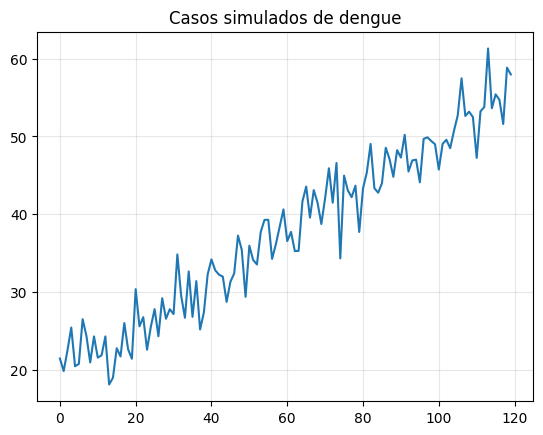

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42) # Estableciendo semilla aleatoria Para reproducibilidad

# Simulamos una serie con tendencia
n = 120
tiempo = np.arange(n) # variable de tiempo
casos = 20 + 0.3*tiempo + np.random.normal(0,3,n) # casos como función lineal del tiempo más ruido aleatorio

serie = pd.Series(casos)
serie.plot(title="Casos simulados de dengue")
plt.grid(alpha=0.3)
plt.savefig(r"C:\Users\marco\Downloads\casos_dengue.png")  # Guardamos la figura
plt.show()



## Paso 2: Ajustar distintos modelos ARIMA



In [49]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo 1: ARIMA(1,1,1)
modelo1 = ARIMA(serie, order=(1,1,1))
resultado1 = modelo1.fit()

# Modelo 2: ARIMA(2,1,1)
modelo2 = ARIMA(serie, order=(2,1,1))
resultado2 = modelo2.fit()

# Modelo 3: ARIMA(1,1,2)
modelo3 = ARIMA(serie, order=(1,1,2))
resultado3 = modelo3.fit()


##  Paso 3: Extraer AIC



In [50]:
print("AIC modelo (1,1,1):", resultado1.aic)
print("AIC modelo (2,1,1):", resultado2.aic)
print("AIC modelo (1,1,2):", resultado3.aic)


AIC modelo (1,1,1): 619.3229598173826
AIC modelo (2,1,1): 620.9615652533391
AIC modelo (1,1,2): 619.2059959491227



## Paso 4: Interpretación

El mejor modelo es:

```
ARIMA(1,1,2)
```

porque tiene el **menor AIC**.

---



# 4. Ejemplo más profundo: Ver los componentes del AIC

Podemos verificar:


In [51]:
print("Número de parámetros:", resultado1.df_model)
print("Log-likelihood:", resultado1.llf)



Número de parámetros: 3
Log-likelihood: -306.6614799086913



Y verificar manualmente:



In [52]:
k = resultado1.df_model
logL = resultado1.llf

AIC_manual = 2*k - 2*logL
print("AIC calculado manualmente:", AIC_manual)


AIC calculado manualmente: 619.3229598173826


Esto conecta directamente la teoría con el cálculo computacional.

---



# 5. Interpretación investigativa en nuestro proyecto



En nuestro estudio meteorológico–dengue:

1. Ajustas ARIMA base.
2. Ajustas ARIMAX con temperatura, lluvia, humedad.
3. Comparas AIC.



Si:

$$
AIC_{ARIMAX} < AIC_{ARIMA}
$$

Entonces:

> Las variables meteorológicas mejoran el modelo explicativo.

Esto sería evidencia estadística de relación clima-dengue en Caucasia.

---



# 6. Idea epistemológica importante

El AIC:

* No mide calidad predictiva futura directamente.
* No dice si el modelo es “verdadero”.
* Solo compara modelos dentro del conjunto analizado.



Por eso debe complementarse con:

* RMSE
* Validación temporal
* Diagnóstico de residuos

---


# Ejemplo completo con ARIMAX con variables meteorológicas simuladas.   


# 1. Simulación del escenario epidemiológico

Supongamos:

* Serie mensual (10 años → 120 meses)
* Variables meteorológicas:

  * Temperatura media
  * Precipitación
* El dengue depende:

  * De su pasado (componente AR)
  * De la lluvia con rezago
  * De la temperatura actual

---



# 2. Generación de datos simulados



In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

n = 120 # 10 años de datos mensuales
fechas = pd.date_range(start="2015-01-01", periods=n, freq="ME")

# Variables meteorológicas simuladas
temperatura = 28 + 2*np.sin(np.linspace(0, 12*np.pi, n)) + np.random.normal(0,0.5,n)
lluvia = 200 + 50*np.sin(np.linspace(0, 6*np.pi, n)) + np.random.normal(0,20,n)

# Componente AR(1) para dengue
errores = np.random.normal(0,5,n)
casos = np.zeros(n)

for t in range(1,n):
    casos[t] = (
        0.1*casos[t-1] +      # efecto autoregresivo
        0.2*lluvia[t-1] +    # lluvia con rezago
        0.3*temperatura[t] +  # temperatura actual
        errores[t]
    )

data = pd.DataFrame({
    "temperatura": temperatura,
    "lluvia": lluvia, 
    "casos_dengue": casos
}, index=fechas)
data.head()

,temperatura,lluvia,casos_dengue
2015-01-31,28.248357,215.820639,0.000000
2015-02-28,28.553921,189.699155,51.156622
2015-03-31,29.507942,243.632221,54.432812
2015-04-30,30.388809,194.838744,67.615144
2015-05-31,29.791457,241.339574,48.665218


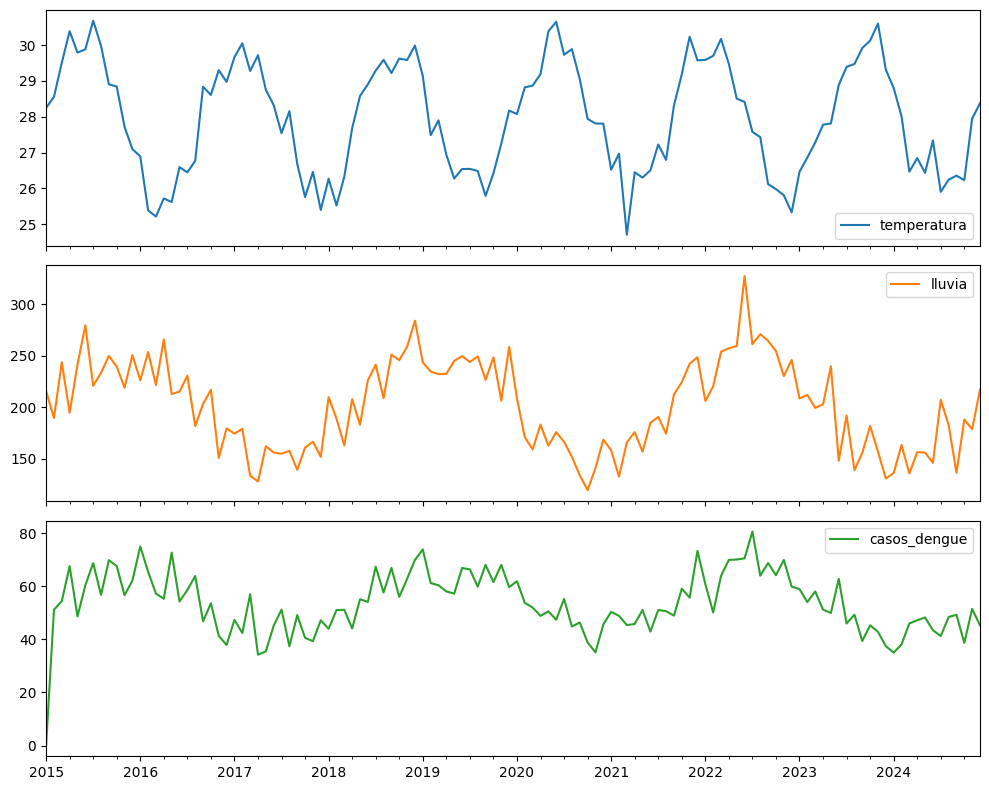

In [54]:

data.plot(subplots=True, figsize=(10,8))
plt.tight_layout()
plt.savefig(r"C:\Users\marco\Downloads\datos_simulados.png")  # Guardamos la figura
plt.show()


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler


In [56]:

# ===============================
# 1. VERIFICACIÓN INICIAL
# ===============================

data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2015-01-31 to 2024-12-31
Freq: ME
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temperatura   120 non-null    float64
 1   lluvia        120 non-null    float64
 2   casos_dengue  120 non-null    float64
dtypes: float64(3)
memory usage: 3.8 KB


In [57]:
data.describe()


,temperatura,lluvia,casos_dengue
count,120.000000,120.000000,120.000000
mean,27.960415,201.487285,53.663677
std,1.524285,43.053059,11.535111
min,24.704224,119.811915,0.000000
25%,26.517263,163.053337,46.018117
50%,27.981964,206.303384,52.800549
75%,29.292494,240.092751,61.669820
max,30.681692,327.015431,80.669241


In [58]:

# ===============================
# 2. CREACIÓN DE REZAGOS CORRECTOS
# ===============================

data["casos_lag1"] = data["casos_dengue"].shift(1)
data["lluvia_lag1"] = data["lluvia"].shift(1)


In [59]:
data.head() 

,temperatura,lluvia,casos_dengue,casos_lag1,lluvia_lag1
2015-01-31,28.248357,215.820639,0.000000,NaN,NaN
2015-02-28,28.553921,189.699155,51.156622,0.000000,215.820639
2015-03-31,29.507942,243.632221,54.432812,51.156622,189.699155
2015-04-30,30.388809,194.838744,67.615144,54.432812,243.632221
2015-05-31,29.791457,241.339574,48.665218,67.615144,194.838744


In [60]:

# Eliminar filas con NaN generados por rezagos
data_model = data.dropna().copy()
data_model.head()

,temperatura,lluvia,casos_dengue,casos_lag1,lluvia_lag1
2015-02-28,28.553921,189.699155,51.156622,0.000000,215.820639
2015-03-31,29.507942,243.632221,54.432812,51.156622,189.699155
2015-04-30,30.388809,194.838744,67.615144,54.432812,243.632221
2015-05-31,29.791457,241.339574,48.665218,67.615144,194.838744
2015-06-30,29.882757,279.397025,60.426758,48.665218,241.339574


In [61]:

# ===============================
# 3. TEST DE ESTACIONARIEDAD (ADF)
# ===============================

def adf_test(series, name=""):
    result = adfuller(series)
    print(f"\nADF Test para {name}")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

adf_test(data_model["casos_dengue"], "Casos Dengue")



ADF Test para Casos Dengue
ADF Statistic: -3.532576962501844
p-value: 0.007188819948935881


In [62]:

# Si p > 0.05 podríamos diferenciar
# data_model["casos_diff"] = data_model["casos_dengue"].diff().dropna()

# ===============================
# 4. ESCALAMIENTO DE VARIABLES EXÓGENAS
# ===============================

scaler = StandardScaler()

exog_vars = data_model[["temperatura", "lluvia_lag1"]]
exog_scaled = scaler.fit_transform(exog_vars)

exog_scaled = pd.DataFrame(
    exog_scaled,
    columns=["temperatura", "lluvia_lag1"],
    index=data_model.index
)
exog_scaled.head()

,temperatura,lluvia_lag1
2015-02-28,0.391013,0.336146
2015-03-31,1.016988,-0.270917
2015-04-30,1.594964,0.982488
2015-05-31,1.203015,-0.151473
2015-06-30,1.262921,0.929207


In [63]:

# ===============================
# 5. MODELO ARIMA (SIN EXÓGENAS)
# ===============================

modelo_arima = SARIMAX(
    data_model["casos_dengue"],
    order=(1,0,0),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

print("\n================ ARIMA ================\n")
print(modelo_arima.summary())



================ ARIMA ================

                               SARIMAX Results                                
Dep. Variable:           casos_dengue   No. Observations:                  119
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -421.740
Date:               vie, 20 feb. 2026   AIC                            847.481
Time:                        17:13:57   BIC                            853.022
Sample:                    02-28-2015   HQIC                           849.731
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9869      0.014     71.063      0.000       0.960       1.014
sigma2        74.4601     11.614      6.411      0.000      51.697      97.223
Ljung-Box 

In [64]:

# ===============================
# 6. MODELO ARIMAX CORRECTAMENTE ESPECIFICADO
# ===============================

modelo_arimax = SARIMAX(
    data_model["casos_dengue"],
    exog=exog_scaled,
    order=(1,0,0),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

print("\n================ ARIMAX ================\n")
print(modelo_arimax.summary())



================ ARIMAX ================

                               SARIMAX Results                                
Dep. Variable:           casos_dengue   No. Observations:                  119
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -383.036
Date:               vie, 20 feb. 2026   AIC                            774.073
Time:                        17:15:05   BIC                            785.156
Sample:                    02-28-2015   HQIC                           778.573
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
temperatura    -2.0104      1.371     -1.466      0.143      -4.698       0.677
lluvia_lag1     8.4056      0.863      9.737      0.000       6.714      10.098
ar.L1

In [65]:

# ===============================
# 7. COMPARACIÓN AIC
# ===============================

print("\nAIC ARIMA :", modelo_arima.aic)
print("AIC ARIMAX:", modelo_arimax.aic)


AIC ARIMA : 847.4805844197685
AIC ARIMAX: 774.0728393791978


- El modelo con menor AIC es preferible.

En esta simulación, el ARIMAX debería tener menor AIC porque los datos fueron generados usando clima.

---



# 6. Interpretación de coeficientes


In [67]:
print(modelo_arimax.summary())


                               SARIMAX Results                                
Dep. Variable:           casos_dengue   No. Observations:                  119
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -383.036
Date:               vie, 20 feb. 2026   AIC                            774.073
Time:                        17:17:05   BIC                            785.156
Sample:                    02-28-2015   HQIC                           778.573
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
temperatura    -2.0104      1.371     -1.466      0.143      -4.698       0.677
lluvia_lag1     8.4056      0.863      9.737      0.000       6.714      10.098
ar.L1           0.9936      0.010     94.741    

Debes observar:

* Coeficiente AR(1) significativo
* Temperatura significativa
* Lluvia significativa

Si los p-valores < 0.05 → variables climáticas influyen estadísticamente.

---


In [68]:
modelo_arimax_diff = SARIMAX(
    data_model["casos_dengue"],
    exog=exog_scaled,
    order=(1,1,0),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

print(modelo_arimax_diff.summary())

                               SARIMAX Results                                
Dep. Variable:           casos_dengue   No. Observations:                  119
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -365.848
Date:               vie, 20 feb. 2026   AIC                            739.695
Time:                        17:18:14   BIC                            750.744
Sample:                    02-28-2015   HQIC                           744.181
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
temperatura    -0.6270      1.112     -0.564      0.573      -2.806       1.552
lluvia_lag1     8.4736      0.939      9.026      0.000       6.634      10.313
ar.L1          -0.4645      0.081     -5.713    

In [69]:
modelo_arimax.aic, modelo_arimax_diff.aic

(np.float64(774.0728393791978), np.float64(739.69508315834))


# 7. Diagnóstico de residuos


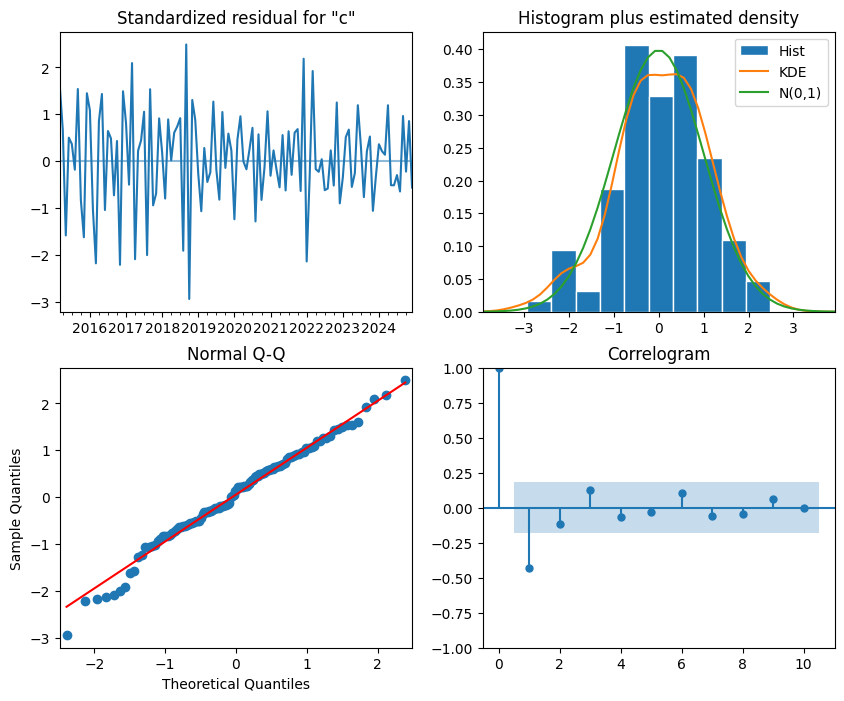

In [70]:
modelo_arimax.plot_diagnostics(figsize=(10,8))
plt.savefig(r"C:\Users\marco\Downloads\diagnosticos_arimax.png")  # Guardamos la figura
plt.show()


Revisar:

* Residuos tipo ruido blanco
* ACF sin autocorrelaciones fuertes

---



# 8. Evaluación predictiva (Train-Test temporal)



In [72]:
train = data_model.iloc[:100]
test = data_model.iloc[100:]

modelo = ARIMA(
    train["casos_dengue"],
    order=(1,0,0),
    exog=train[["temperatura", "lluvia_lag1"]]
)

resultado = modelo.fit()

predicciones = resultado.forecast(
    steps=len(test),
    exog=test[["temperatura","lluvia"]]
)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test["casos_dengue"], predicciones))

print("RMSE:", rmse)


RMSE: 8.31484706777524



# 9. Interpretación epidemiológica

Si obtienes:

* ARIMAX con menor AIC
* Variables significativas
* RMSE bajo
* Residuos sin autocorrelación

Entonces puedes afirmar:

> Existe evidencia estadística de que las variables meteorológicas mejoran la predicción de dengue en Caucasia.

---



# 10 Diferencia conceptual ARIMA vs ARIMAX

| Modelo | Qué explica                            |
| ------ | -------------------------------------- |
| ARIMA  | Dinámica interna de la enfermedad      |
| ARIMAX | Dinámica interna + factores climáticos |

En epidemiología tropical, el ARIMAX suele capturar mejor el fenómeno porque el mosquito Aedes depende fuertemente de condiciones climáticas.

---



# 11. Cómo usar esto en tu investigación

Puedes estructurar tu sección metodológica así:

1. Modelado ARIMA base
2. Inclusión de variables meteorológicas
3. Comparación por AIC
4. Validación temporal
5. Interpretación epidemiológica

---



## b) BIC — Bayesian Information Criterion

$$
BIC = k\ln(n) - 2\ln(L)
$$

* Penaliza aún más la complejidad.
* Favorece modelos más simples.

---



# 3) Diagnóstico de residuos (validez estadística)

Un buen ARIMA/ARIMAX debe dejar residuos como **ruido blanco**.



## a) Prueba de Ljung-Box

Evalúa autocorrelación en residuos.

* H₀: los residuos son independientes.
* Si p > 0.05 → modelo adecuado.

---



## b) Autocorrelation Function (ACF) de residuos

Debe mostrar valores cercanos a cero.

---



## c) Normalidad de residuos

* Shapiro-Wilk
* Jarque-Bera

Importante para intervalos de predicción epidemiológicos.

---



# 4) Métricas específicas para modelos ARIMAX

En ARIMAX se agregan variables meteorológicas:

* temperatura
* precipitación
* humedad
* radiación UV

Aquí evaluamos además:



## a) Significancia de coeficientes

$$
p < 0.05
$$

Indica que la variable meteorológica explica el dengue.

---



## b) Impacto causal interpretativo

Ejemplo:

* aumento de lluvia → aumento de casos
* rezagos de 2–8 semanas → coherencia epidemiológica

---



# 5) Validación temporal (clave en tu investigación)

No se debe usar validación aleatoria.

Usar:

### a) Train / test temporal

* Entrenar: 2015–2022
* Probar: 2023–2024



### b) Rolling forecast

Entrenamiento progresivo.

Esto simula predicción real en salud pública.

---



# 6) Métricas recomendadas para tu proyecto de dengue

Prioriza:

### Núcleo epidemiológico

* RMSE
* MAE
* MAPE / sMAPE



### Selección del modelo

* AIC
* BIC

### Validación estadística

* Ljung-Box
* ACF de residuos



### Interpretación científica

* significancia de variables climáticas

---



# 7) Ejemplo de flujo metodológico

1. Modelar ARIMA base (solo casos dengue)
2. Modelar ARIMAX (con clima)
3. Comparar:

   * AIC
   * RMSE
4. Validar residuos
5. Evaluar interpretabilidad epidemiológica

---



# 8) Métrica más importante según el objetivo

Depende del propósito del proyecto:

### Predicción operativa en salud pública

→ RMSE + MAE

### Publicación científica

→ AIC + BIC + Ljung-Box

### Comprensión del fenómeno dengue-clima

→ ARIMAX + significancia de coeficientes

---



# 9) Recomendación metodológica fuerte

Para dengue, la literatura muestra que:

* ARIMA predice tendencia
* ARIMAX explica causalidad climática

Por tanto:

**La combinación ideal es:**

* ARIMAX + validación temporal + RMSE.

---
